In [41]:
 from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta
from matplotlib.colors import LinearSegmentedColormap
def plot_confusion_matrix_mod(cm,accuracy,name):
    """
    Plots a confusion matrix with confidence intervals for accuracy.

    Parameters:
    cm (array-like): Confusion matrix.
    accuracy (float): Accuracy of the model.
 
    """
    sns.set(style="whitegrid")
    
    # accuracy = 100 * sum(true_labels == pred_labels) / len(true_labels)

    plt.figure(figsize=(10, 8))
    fig,ax = plt.subplots(figsize=(10, 8))
    colors = ["#cce5ff", "#004c99"]
    cmap = LinearSegmentedColormap.from_list("Custom Blue", colors)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap,
                xticklabels=["Proton", "Pion"], yticklabels=["Proton", "Pion"],
                annot_kws={"size": 38, "weight": "bold"})
    colorbar = ax.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=20) 
    
    TP, FN = cm[0, 0], cm[0, 1]
    FP, TN = cm[1, 0], cm[1, 1]
  
    n_total = TP + TN + FP + FN
    n_correct = TP + TN
    alpha = 0.32

    lower_bound = beta.ppf(alpha / 2, n_correct, n_total - n_correct + 1)
    upper_bound = beta.ppf(1 - alpha / 2, n_correct + 1, n_total - n_correct)
    
    title = f"Accuracy: {accuracy:.2f}%, 68% CI: [{lower_bound*100:.2f}%, {upper_bound*100:.2f}%]"
    title_size = 20
    label_size = 20
    tick_size = 20
    plt.title(title, fontsize=title_size, weight='bold')
    plt.xlabel('Predicted', size=label_size, weight='bold')
    plt.ylabel('True', size=label_size, weight='bold')
    plt.xticks(size=tick_size, weight='bold')
    plt.yticks(size=tick_size, weight='bold')
    print(f"./Plots/confusion_matrix_{name}.pdf")
    plt.show()
    plt.savefig(f"../Plots_large/confusion_matrix_{name}.pdf", dpi=300, bbox_inches='tight')
    plt.close()

./Plots/confusion_matrix_25GeV_200.pdf


<Figure size 1000x800 with 0 Axes>

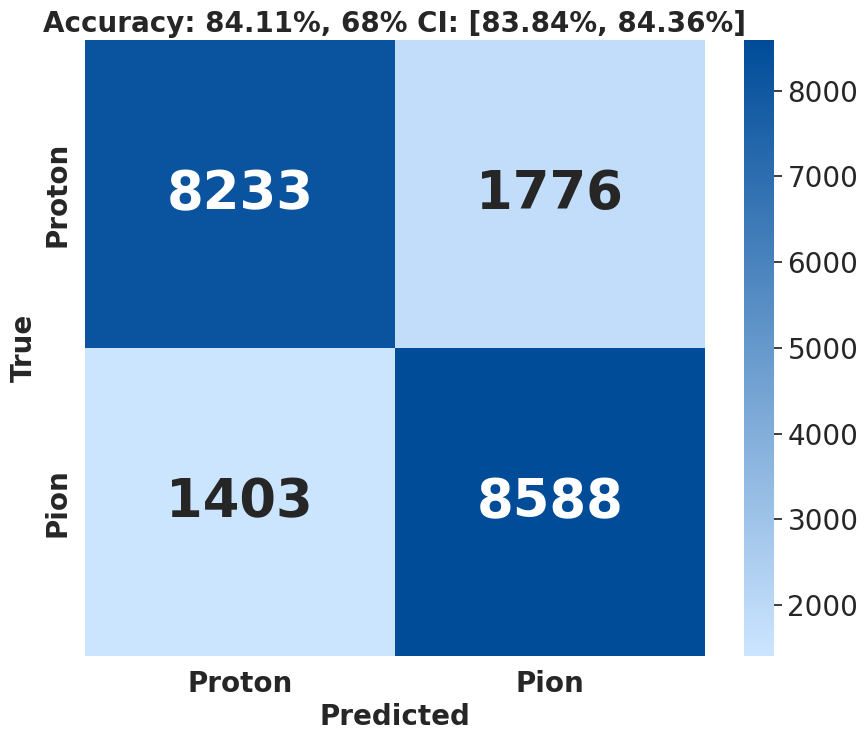

In [42]:
import numpy as np
cm=np.array([[8233, 1776], [1403, 8588]])
accuracy = 84.11  # Example accuracy value
energy,granuarity = 25, 200  # Example energy and granularity values
name=f"{energy}GeV_{granuarity}"
plot_confusion_matrix_mod(cm, accuracy,name)